In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow import keras

In [13]:
df = pd.read_csv('one_dataset.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.rename(columns = {
    "YearsExperience": "Experience",
    "Salary":  "Salary" 
}, inplace=True)
df.to_csv('one_dataset.csv', index=False)
print(df.head())

   Experience   Salary
0         1.2  39344.0
1         1.4  46206.0
2         1.6  37732.0
3         2.1  43526.0
4         2.3  39892.0


In [17]:
def predict_salary(experience):
    model_path = 'one.keras'
    x = df['Experience'].values.reshape(-1,1)
    y = df['Salary'].values.reshape(-1,1)
    xn = x.min()
    xx = x.max()
    yn = y.min()
    yx = y.max()
    x = (x-xn)/(xx-xn)
    y = (y-yn)/(yx-yn)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(1,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = 'adam', loss='mean_squared_error')
        hist = model.fit(x,y, epochs=500)
        model.save('one.keras')
        lv = hist.history['loss']
        pred= model.predict(x)
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.scatter(x, y, label='actual', color='blue')
        plt.plot(x,pred, label='predicted', color='pink')
        plt.grid(True)
        plt.xlabel('Experience')
        plt.ylabel('Salary')
        plt.legend()
        plt.show()
    return model.predict(np.array([[(experience-xn)/(xx-xn)]]))[0][0]*(yx-yn)+yn


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1012
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0920
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0833
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0750
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0674
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0604
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0543
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0489
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0440
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0395
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0354
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0317
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0283
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0253
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0226
Epoch 16/500
1/1 ━━━━

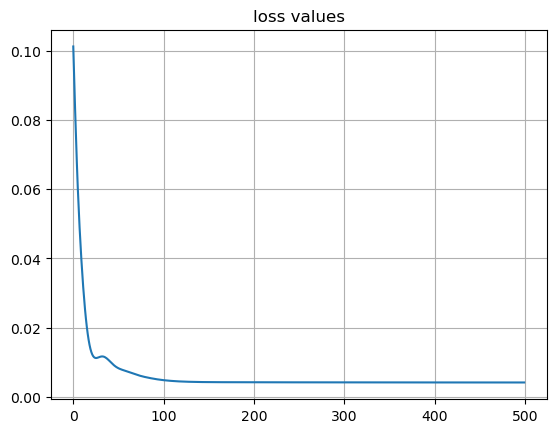

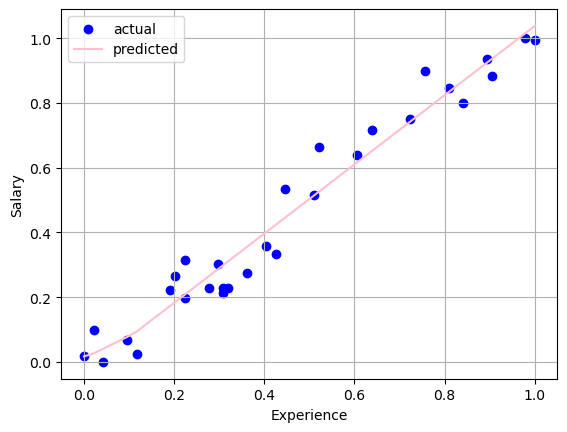

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
71684.53736495972
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
57237.45046597719


In [18]:
print(predict_salary(5))
print(predict_salary(3.5))